当前运行到第 0
当前运行到第 1
当前运行到第 2
当前运行到第 3
当前运行到第 4
当前运行到第 5
当前运行到第 6
当前运行到第 7
当前运行到第 8
当前运行到第 9


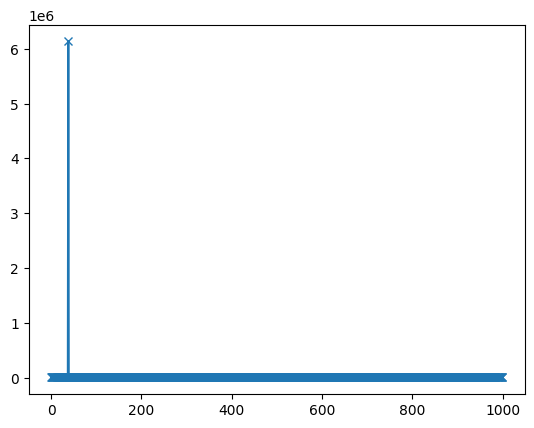

In [9]:
#该代码求解min y=0.6224*x1*x3*x4+1.7781*x2*x3^2+3.1661*x1^2*x4+19.84*x1^2*x3
import torch
import torch.nn as nn
from torchsummary import summary
import pdb
import math
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
from tensorboardX import SummaryWriter
from torch.utils.tensorboard import SummaryWriter
import torch.nn.init as init
# def fanfunc(x):
#     k=100#y属于(0,k)
#     result = torch.log((x /(k-x))) / 2
#     return result #这里加了绝对值防止对数取负数报错
def fanfunc1(x):
    a=0.7
    b=0.8#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc2(x):
    a=0.3
    b=0.4#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc3(x):
    a=38
    b=45#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc4(x):
    a=195
    b=200#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错


class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def forward(self, x):
        k=500000
        x1,x2,x3,x4 = x[:, 0], x[:, 1], x[:, 2], x[:, 3]
        x1 = fanfunc1(x1)
        x2 = fanfunc2(x2)
        x3 = fanfunc3(x3)
        x4 = fanfunc4(x4)
        
        y1 = -x1+0.0193*x3
        y2 = -x2+0.00954*x3
        y3 = -(np.pi)*pow(x3,2)*x4-(np.pi)*pow(x3,3)*4/3+1296000
        y4 = x4-240
        y5 = 0.6224*x1*x3*x4+1.7781*x2*pow(x3,2)+3.1661*pow(x1,2)*x4+19.84*pow(x1,2)*x3


        y1 = F.relu(y1)
        y2 = F.relu(y2)
        y3 = F.relu(y3)
        y4 = F.relu(y4)
        
        y1 = k*y1
        y2 = k*y2
        y3 = k*y3
        y4 = k*y4
       
        return torch.stack([y1, y2, y3, y4, y5], dim=1)
    

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(1, 4)
        self.fc2 = CustomLayer()
        self.fc3 = nn.Linear(5, 1)

        self.fc1.weight.requires_grad = True
        self.fc1.bias.requires_grad = False
        #self.fc2.weight.requires_grad = False
        #self.fc2.bias.requires_grad = False
        self.fc3.weight.requires_grad = False
        self.fc3.bias.requires_grad = False

        init.uniform_(self.fc1.weight, 0,1)

#         A=0.5
#         B=28
#         init.uniform_(self.fc1.weight.data[0][0], (2.6-A)/(B-A), (3.6-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[1][0], (0.7-A)/(B-A), (0.8-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[2][0], (17-A)/(B-A), (28-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[3][0], (7.3-A)/(B-A), (8.3-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[4][0], (7.8-A)/(B-A), (8.3-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[5][0], (2.9-A)/(B-A), (3.9-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[6][0], (5-A)/(B-A), (5.5-A)/(B-A))
        #init.normal_(self.fc1.weight, mean=0, std=0.01)
        #init.xavier_normal_(self.fc1.weight)

        #self.fc1.weight.data.fill_(0.99) #初始化权重
#         self.fc1.weight.data[0, 0] = 0.7468 # 这是 w1 的初始值
#         self.fc1.weight.data[1, 0] = 0.61 # 这是 w2 的初始值

        self.fc1.bias.data.fill_(0)
        self.fc3.weight.data.fill_(1) #初始化权重
        self.fc3.bias.data.fill_(0)

    def forward(self, x):

        b = self.fc1(x)
        #print(self.fc1.weight) 
        #print('x=',x)
        #print('x_size',x.size())
        #print('b=',b)
        c = self.fc2(b)
        #print('c=',c)
        d = self.fc3(c)
        #print('d=',d)
        #print('w1=',w1)
        #print('w2=',w2)
        return d  
NUM=10
RESULT_MIN=np.zeros(NUM)
RESULT_W1=np.zeros(NUM)
RESULT_W2=np.zeros(NUM)
RESULT_W3=np.zeros(NUM)
RESULT_W4=np.zeros(NUM)
for i in range(NUM):
    print('当前运行到第',i)
    net = MyNet()
    MAX = 10000
    def train(model):
        #model.fc1.reset_parameters()#重置网络参数
        model.train()
        optimizer = optim.Adam(model.parameters(), lr=0.0001)
        train_loss = 0
        x = torch.tensor([[1.0]],requires_grad=True)
        n=1
        R_w1=[]
        R_w2=[]
        R_w3=[]
        R_w4=[]
        R=[]
        prev_loss = float('inf') 
        while True:
            optimizer.zero_grad()
            loss = model(x)
            loss.requires_grad_(True)
            #print('loss=',loss)
            loss.backward()
            
            
            R.append(loss.detach().numpy())
            R_w1.append(model.fc1.weight[0][0].item())
            R_w2.append(model.fc1.weight[1][0].item())
            R_w3.append(model.fc1.weight[2][0].item())
            R_w4.append(model.fc1.weight[3][0].item())
            
            
            optimizer.step()
            k=1
            model.fc1.weight.data.clamp_(0, k)
            train_loss += loss.item()
            n = n+1
            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            #if abs(prev_grad_norm - grad_norm) < 1e-6:
            
            if loss.item() > prev_loss and n > 1000:
            #if n>MAX:
            #if loss.item() < 1e-6:  # 收敛条件
                break
            prev_loss = loss.item()
            if n>10000:
                break

        return loss,np.squeeze(R),R_w1,R_w2,R_w3,R_w4
    loss=[]
    R=[]
    R_w1=[]
    R_w2=[]
    R_w3=[]
    R_w4=[]  
    loss,R,R_w1,R_w2,R_w3,R_w4=train(net)
    RESULT_MIN[i]=R[np.argmin(R)]
    RESULT_W1[i]=R_w1[np.argmin(R)]
    RESULT_W2[i]=R_w2[np.argmin(R)]
    RESULT_W3[i]=R_w3[np.argmin(R)]
    RESULT_W4[i]=R_w4[np.argmin(R)]




loss,R,R_w1,R_w2,R_w3,R_w4=train(net)
x=np.arange(len(R))
plt.plot(x,R,marker="x")
plt.show()
# 生成计算图
# x = torch.tensor([[1.0, 1.0]],requires_grad=True)
# out = net(x)
# make_dot(out, params=dict(net.named_parameters()))
writer = SummaryWriter()
writer.add_graph(net, torch.tensor([[1.0]],requires_grad=True))
writer.close()


In [10]:
www=np.argmin(RESULT_MIN)
w1=fanfunc1(RESULT_W1[www])
w2=fanfunc2(RESULT_W2[www])
w3=fanfunc3(RESULT_W3[www])
w4=fanfunc4(RESULT_W4[www])
MIN=min(RESULT_MIN)
print('w1=',w1,'w2=',w2,'w3=',w3,'w4=',w4,'min=',MIN)

w1= 0.7800299823284149 w2= 0.38506090044975283 w3= 40.467533737421036 w4= 198.06311756372452 min= 5882.56640625


In [7]:
x1 = w1
x2 = w2
x3 = w3
x4 = w4
y1 = -x1+0.0193*x3
y2 = -x2+0.00954*x3
y3 = -(np.pi)*pow(x3,2)*x4-(np.pi)*pow(x3,3)*4/3+1296000
y4 = x4-240
y5 = 0.6224*x1*x3*x4+1.7781*x2*pow(x3,2)+3.1661*pow(x1,2)*x4+19.84*pow(x1,2)*x3
print('y1-y4:',y1,y2,y3,y4,'F=',y5)

y1-y4: -6.65485858641901e-08 9.633898728766965e-08 -23.911594859324396 -40.0 F= 5885.444478761072


In [103]:
RESULT_MIN

array([ 93024.40625   ,  48997.6484375 ,  84350.7578125 ,   5964.48339844,
         5996.20458984,   5917.15673828,   5955.45605469,   5919.46533203,
         5911.3203125 ,   6034.99414062,   6030.44238281,  17816.9140625 ,
         5940.09716797,  95763.5546875 ,   5928.05712891,   5918.32324219,
         5930.80517578,   5911.67626953,   5892.70703125, 129074.875     ,
       126320.5546875 ,   5902.42089844,   5971.05566406,  42363.3046875 ,
        29131.68359375,  39444.01953125,   5912.81738281,   5922.98925781,
         6847.98681641,  10256.18359375,  70815.828125  ,   6009.99560547,
        22478.74804688, 137681.703125  ,   5932.03613281,   5899.76025391,
         5933.67529297,   6061.18994141,  27228.39453125,  83244.1640625 ,
         5915.10351562,   5916.34716797,   5925.87304688,  91795.1328125 ,
         5989.90673828,  95210.703125  ,   5977.9140625 ,   5953.46386719,
         5919.81445312,   5925.27197266,  21220.83203125,   5965.55371094,
         5963.32568359,  

In [3]:
import numpy as np
x1 = 0.920470542705456
x2 = 0.454909178055385
x3 = 48.036406178246500
x4 = 114.8264380016920
y1 = -x1+0.0193*x3
y2 = -x2+0.00954*x3
y3 = -(np.pi)*pow(x3,2)*x4-(np.pi)*pow(x3,3)*4/3+1296000
y4 = x4-240
y5 = 0.6224*x1*x3*x4+1.7781*x2*pow(x3,2)+3.1661*pow(x1,2)*x4+19.84*pow(x1,2)*x3
print('y1-y4:',y1,y2,y3,y4,'F=',y5)

y1-y4: 0.006632096534701537 0.0033581368850866267 -702.9135917532258 -125.173561998308 F= 6142.014303809759
